In [9]:
import twint
import nest_asyncio
import pandas as pd
from IPython.display import HTML
import requests

from datetime import timedelta
from string import ascii_letters, digits
from os import mkdir, path
from glob import glob

nest_asyncio.apply()

In [10]:
def clean_name(dirname):
    '''
    Validar que el nombre del directorio donde se van a almacenar los jsons por fecha es valido
    '''
    valid = set(ascii_letters + digits)
    return ''.join(a for a in dirname if a in valid)


def twint_search(searchterm, since, until, json_name):
    '''
    Búsqueda de tweets por término y rango de fechas
    '''
    c = twint.Config()
    c.Search = searchterm
    c.Since = since
    c.Until = until
    c.Hide_output = True
    c.Store_json = True
    c.Output = json_name
    c.Debug = True

    try:
        twint.run.Search(c)    
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print("Problem with %s." % since)


def twint_loop(searchterm, since, until):
    """
    Almacenar los jsons en el directorio que se va a llamar igual al término de búsqueda
    """

    dirname = clean_name(searchterm)
    try:
    # Create target Directory
        mkdir(dirname)
        print("Directory" , dirname ,  "Created ")
    except FileExistsError:
        print("Directory" , dirname ,  "already exists")

    daterange = pd.date_range(since, until)

    for start_date in daterange:

        since= start_date.strftime("%Y-%m-%d")
        until = (start_date + timedelta(days=1)).strftime("%Y-%m-%d")

        json_name = '%s.json' % since
        json_name = path.join(dirname, json_name)

        print('Getting %s ' % since )
        twint_search(searchterm, since, until, json_name)


In [11]:
twint_loop('econtwitter', '2020-01-01', '2020-06-19')


Directory econtwitter Created 
Getting 2020-01-01 
Getting 2020-01-02 
Getting 2020-01-03 
Getting 2020-01-04 
Getting 2020-01-05 
Getting 2020-01-06 
Getting 2020-01-07 
Getting 2020-01-08 
Getting 2020-01-09 
Getting 2020-01-10 
Getting 2020-01-11 
Getting 2020-01-12 
Getting 2020-01-13 
Getting 2020-01-14 
Getting 2020-01-15 
Getting 2020-01-16 
Getting 2020-01-17 
Getting 2020-01-18 
Getting 2020-01-19 
Getting 2020-01-20 
Getting 2020-01-21 
Getting 2020-01-22 
Getting 2020-01-23 
Getting 2020-01-24 
Getting 2020-01-25 
Getting 2020-01-26 
Getting 2020-01-27 
Getting 2020-01-28 
Getting 2020-01-29 
Getting 2020-01-30 
Getting 2020-01-31 
Getting 2020-02-01 
Getting 2020-02-02 
Getting 2020-02-03 
Getting 2020-02-04 
Getting 2020-02-05 
Getting 2020-02-06 
Getting 2020-02-07 
Getting 2020-02-08 
Getting 2020-02-09 
Getting 2020-02-10 
Getting 2020-02-11 
Getting 2020-02-12 
Getting 2020-02-13 
Getting 2020-02-14 
Getting 2020-02-15 
Getting 2020-02-16 
Getting 2020-02-17 
Getting 2

In [12]:
from glob import glob

file_names = glob(path.join('econtwitter','*.json'))
dfs = [pd.read_json(fn, lines = True) for fn in file_names]
df = pd.concat(dfs)



In [13]:
def show_tweet(link):
    '''Display the contents of a tweet. '''
    url = 'https://publish.twitter.com/oembed?url=%s' % link
    response = requests.get(url)
    html = response.json()["html"]
    display(HTML(html))

In [14]:
# A list of the tweet urls, sorted by retweet count.
rt_links = df.sort_values(by= 'retweets_count', ascending = False)['link'].values

for url in rt_links[:20]:
    print('🔥 ' * 19)
    show_tweet(url)

🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


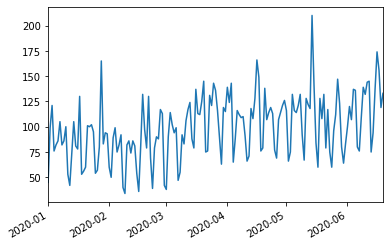

In [15]:
%matplotlib inline

df['date'].value_counts().plot()

In [16]:
df.to_csv('df_econtwitter.csv')